<a href="https://colab.research.google.com/github/mohaljamal/hu-bby261-2020/blob/main/KmToMile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Select:
(a) To convert KM to MILE
(b) To Convert MILE to KM
b
Enter number of epochs: 20
----- Training Values -----
0.0062 MIL = 0.01 KM
0.062 MIL = 0.1 KM
0.62 MIL = 1.0 KM
1.8641 MIL = 3.0 KM
3.1069 MIL = 5.0 KM
4.3496 MIL = 7.0 KM
6.83508 MIL = 11.0 KM
12.4274 MIL = 20.0 KM
24.8548 MIL = 40.0 KM
43.496 MIL = 70.0 KM
62.1371 MIL = 100.0 KM
93.2057 MIL = 150.0 KM
---------------------------
Enter your Mile value: 10
Exact value in KMs: 16.093444978925632 km
---------------------------
Num of Epochs: 20
Predicted value in KMs: [[19.678288]] km
---------------------------
Layer variables: [array([[1.8171662]], dtype=float32), array([1.5066265], dtype=float32)]


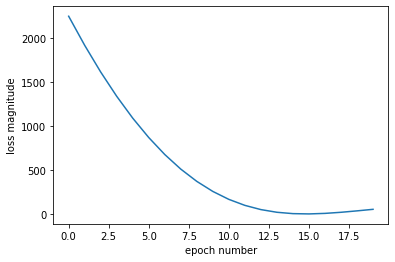

In [3]:
import logging
import numpy
import tensorflow as tf
import matplotlib.pyplot as plot



logger = tf.get_logger()
logger.setLevel(logging.ERROR)

KM = numpy.array([0.01, 0.1,  1,  3, 5, 7, 11,20, 40,70,100,150 ],  dtype=float)
MIL = numpy.array([0.0062, 0.062,0.62, 1.8641, 3.1069, 4.3496, 6.83508,12.4274,24.8548,43.496,62.1371,93.2057],  dtype=float)

choice = input("Select:\n(a) To convert KM to MILE\n(b) To Convert MILE to KM\n")




if choice=="a":
  trainingTimes = int(input("Enter number of epochs: "))
  print("----- Training Values -----")
  for index,value in enumerate(KM):
    print("{} KM = {} MIL".format(value, MIL[index]))
  print("---------------------------")
  kmToCalculate = float(input("Enter your KM value: "))

  l1 = tf.keras.layers.Dense(units=1, input_shape=[1])
  model = tf.keras.Sequential([l1])
  model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1)) 
  realExactAnswer = kmToCalculate * 0.621371
  print("Exact value in MILES: {} mile".format(realExactAnswer))
  
  print("---------------------------")
  print("Num of Epochs: {}".format(trainingTimes))  
  history= model.fit(KM, MIL, epochs=trainingTimes, verbose=False)
  predictedValue = model.predict([kmToCalculate])
  print("Predicted value in MILES: {} mile".format(predictedValue))
  plot.xlabel('epoch number')
  plot.ylabel('loss magnitude')
  plot.plot(history.history['loss'])
  print("---------------------------")
  print("Layer variables: {}".format(l1.get_weights()))

elif choice == "b":
  trainingTimes = int(input("Enter number of epochs: "))
  print("----- Training Values -----")
  for index,value in enumerate(KM):
    print("{} MIL = {} KM".format(MIL[index],value))
  print("---------------------------")
  mileToCalculate = float(input("Enter your Mile value: "))
  l1 = tf.keras.layers.Dense(units=1, input_shape=[1])
  model = tf.keras.Sequential([l1])
  model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
  
  realExactAnswer = mileToCalculate / 0.621371
  print("Exact value in KMs: {} km".format(realExactAnswer))
 
  print("---------------------------")
  print("Num of Epochs: {}".format(trainingTimes))  
  history= model.fit(MIL, KM, epochs=trainingTimes, verbose=False)
  predictedValue = model.predict([mileToCalculate])
  print("Predicted value in KMs: {} km".format(predictedValue))
  plot.xlabel('epoch number')
  plot.ylabel('loss magnitude')

  plot.plot(history.history['loss'])


  print("---------------------------")
  print("Layer variables: {}".format(l1.get_weights()))

else:
    print("You entered a choice that is not in the list")